In [7]:
import tensorflow as tf
from tensorflow.keras import layers

In [115]:
import matplotlib.pyplot as plt

In [9]:
mnist = tf.keras.datasets.mnist

In [247]:
class CnnModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(CnnModel, self).__init__() ##Calls init for tf.keras.models to access its methods. tf.keras.models is a superclass to CNN

        self.conv1 = layers.Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1))
        self.pool1 = layers.MaxPooling2D(pool_size=(2,2))

        self.conv2 = layers.Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu')
        self.pool2 = layers.MaxPooling2D(pool_size=(2,2))

        self.flatten = layers.Flatten()

        self.dense1 = layers.Dense(128, activation='relu')
        self.dropout = layers.Dropout(0.5)
        self.dense2 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)

        if training:
            x = self.dropout(x)

        x = self.dense2(x)

        return x

In [119]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

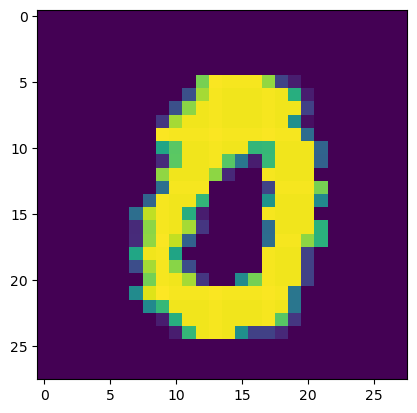

In [143]:
plt.imshow(x_train[69])
plt.show()

In [123]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

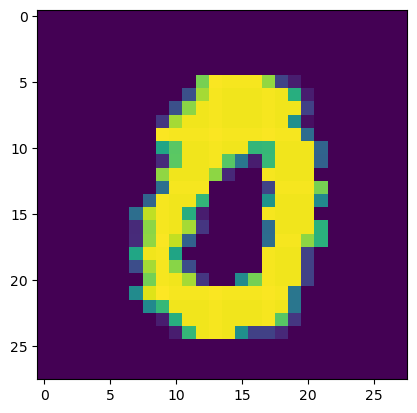

In [135]:
plt.imshow(x_train[69])
plt.show()

In [127]:
x_train.shape

(60000, 28, 28)

In [129]:
#slicing operation (...) to add a newaxis
# x_train = x_train[tf.newaxis, ...] makes the dimensions (1, 60000, 28, 28)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [131]:
x_train.shape

(60000, 28, 28, 1)

In [105]:
y_train[0]

5

In [107]:
#One-way Encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [109]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [111]:
model = CnnModel(num_classes=10)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [113]:
history = model.fit(
    x_train, y_train, 
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.7813 - loss: 0.7017 - val_accuracy: 0.9746 - val_loss: 0.0819
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9634 - loss: 0.1222 - val_accuracy: 0.9820 - val_loss: 0.0578
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9737 - loss: 0.0872 - val_accuracy: 0.9858 - val_loss: 0.0462
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9807 - loss: 0.0674 - val_accuracy: 0.9876 - val_loss: 0.0406
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9831 - loss: 0.0569 - val_accuracy: 0.9876 - val_loss: 0.0405
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9857 - loss: 0.0473 - val_accuracy: 0.9884 - val_loss: 0.0401
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9901 - val_loss: 0.0363
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9891 - loss: 0.0358 - 

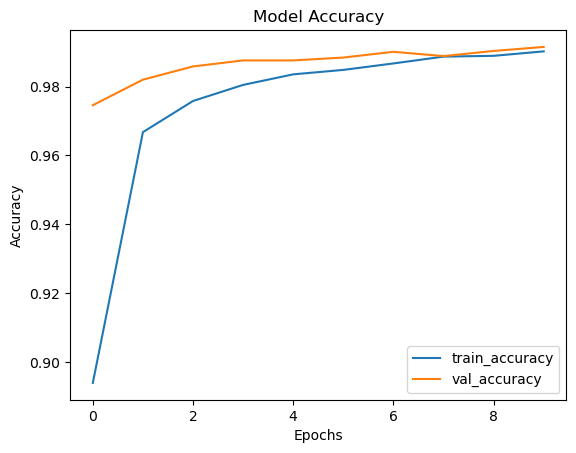

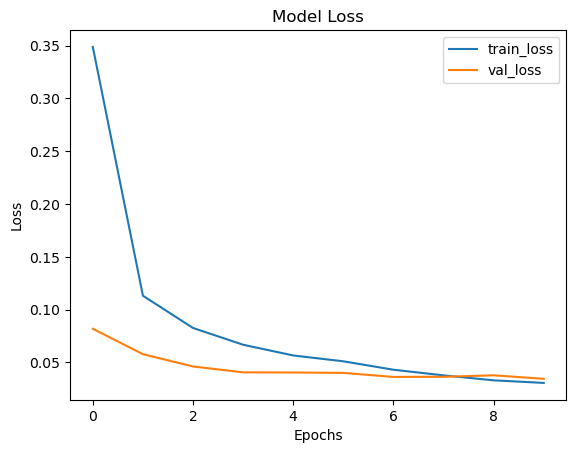

In [117]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [267]:
##just copy and pasted the cnnmodel..to play around with layers, kernel size, dropout...

class FashionCnnModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(FashionCnnModel, self).__init__() ##Calls init for tf.keras.models to access its methods. tf.keras.models is a superclass to CNN

        self.conv1 = layers.Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1))
        self.pool1 = layers.MaxPooling2D(pool_size=(2,2))

        self.conv2 = layers.Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu')
        self.pool2 = layers.MaxPooling2D(pool_size=(2,2))

        self.flatten = layers.Flatten()

        self.dense1 = layers.Dense(256, activation='relu')
        self.dropout = layers.Dropout(0.5)
        self.dense2 = layers.Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)

        if training:
            x = self.dropout(x)

        x = self.dense2(x)

        return x

In [205]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [207]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [209]:
x_train.shape[1:]

(28, 28)

In [211]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

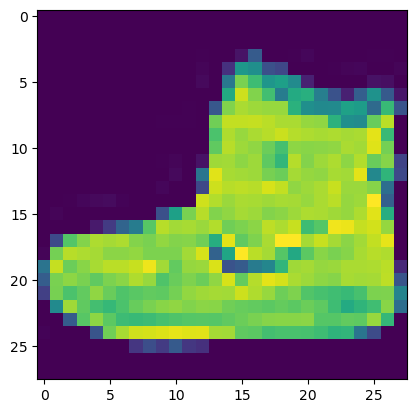

In [213]:
plt.imshow(x_train[0])

In [215]:
y_train[0]

9

In [217]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [219]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [237]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [277]:
fashion_model = FashionCnnModel(num_classes=10)

In [279]:
fashion_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [281]:
fashion_history = fashion_model.fit(
    x_train, y_train,
    batch_size = 32,
    epochs = 10,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 74s 45ms/step - accuracy: 0.7426 - loss: 0.7149 - val_accuracy: 0.8760 - val_loss: 0.3377
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.8709 - loss: 0.3536 - val_accuracy: 0.8942 - val_loss: 0.2855
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 45ms/step - accuracy: 0.8927 - loss: 0.2970 - val_accuracy: 0.8942 - val_loss: 0.2863
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.9026 - loss: 0.2619 - val_accuracy: 0.9107 - val_loss: 0.2411
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.9148 - loss: 0.2309 - val_accuracy: 0.9122 - val_loss: 0.2392
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.9208 - loss: 0.2149 - val_accuracy: 0.9133 - val_loss: 0.2451
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.9272 - loss: 0.1944 - val_accuracy: 0.9160 - val_loss: 0.2418
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.9326 -

In [264]:
x_train.shape

(60000, 28, 28, 1)

In [233]:
y_train.shape

(60000, 10)

In [235]:
y_train.dtype

dtype('float64')

In [283]:
# 1 epoch
# 32, 64, 128 = 71.8
# 64, 128, 128 = 71.8
# 64, 128, 256 = 74.45

In [287]:
import keras_tuner as kt

In [301]:
def build_model(hp):
    fashion_model = FashionCnnModel(num_classes=10)

    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    fashion_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
    )

    return fashion_model
    

In [303]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    overwrite=True,
    max_trials=5,
    executions_per_trial=2,
    directory='mnist_tuning',
    project_name='cnn_mnist'
)

In [305]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [307]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(
    x_train, y_train,
    epochs=3,
    validation_split=0.2
)

Trial 3 Complete [00h 07m 00s]
val_accuracy: 0.8964166641235352

Best val_accuracy So Far: 0.9007916748523712
Total elapsed time: 00h 21m 02s


In [313]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
